You have a time series of revenue from a particular sport gear store. It is time series with weeks assigned. The time series have seasonality and trend. The goal is to predict the next 10 weeks as accurately as possible. The data is attached in Excel file, please use software that you see fit and provide the code together with your answers. The code has to be run through, that means if I open in R environment I should be able to run end to end and have the forecast in the output. The white paper should have explanation of model selection and the criteria of the choice of the model and parameters if needed.

In [63]:
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_formate = 'retina'

In [64]:
data = pd.read_excel('Time series for STat Take Home test.xlsx')

In [65]:
data.head(3)

,week,Rev from a Sport Store retail
0,15-W01,9.956822e+05
1,15-W02,1.175470e+06
2,15-W03,1.406700e+06


In [66]:
data.rename(columns = {'Rev from a Sport Store retail' : 'revenue'}, inplace = True)

In [67]:
data.isnull().sum()

week        0
revenue    10
dtype: int64

In [68]:
data.tail(10)

,week,revenue
271,test_-W11,NaN
272,test_-W12,NaN
273,test_-W13,NaN
274,test_-W14,NaN
275,test_-W15,NaN
276,test_-W16,NaN
277,test_-W17,NaN
278,test_-W18,NaN
279,test_-W19,NaN
280,test_-W20,NaN


In [69]:
test_df = data.loc[data['week'].str.contains('test'), : ]
train_df = data.iloc[:270, :]

In [70]:
print(train_df.shape, test_df.shape)

(270, 2) (10, 2)


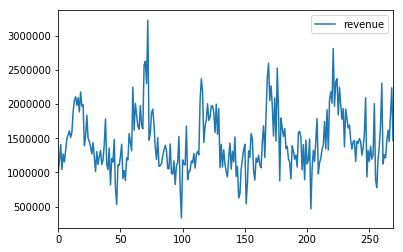

In [71]:
train_df.plot();

In [98]:
# plt.figure(figsize=(12,9))
# plt.plot(train_df['revenue'])
# plt.plot(train_df['revenue'].rolling(8).mean());

***
Next, I need a validation set to test the predictive model on. <br />
Since we can't randomly split a time series dataset, we will take the first 80% as training, and last 20% as validation. 

In [106]:
# a function gives which row should I stop at to get the first q% of the dataset
def grab_quans(q:float):
    
    # find which row number is the qth row in the Series
    qth = int(train_df.shape[0]*q)
    
    #return the index corresponding to the qth row from the dataframe
    return train_df.iloc[qth:].index[0]

In [107]:
grab_quans(q = .8)

216

In [123]:
validation_df = train_df.iloc[216:,:]
X = train_df.iloc[:216,:]
X.head()

,week,revenue
0,15-W01,9.956822e+05
1,15-W02,1.175470e+06
2,15-W03,1.406700e+06
3,15-W04,1.042557e+06
4,15-W05,1.268013e+06


In [124]:
X.tail()

,week,revenue
211,19-W03,1.207950e+06
212,19-W04,1.339105e+06
213,19-W05,1.401570e+06
214,19-W06,1.743863e+06
215,19-W07,1.346323e+06


In [125]:
validation_df.head()

,week,revenue
216,19-W08,1.915018e+06
217,19-W09,1.327961e+06
218,19-W10,2.061709e+06
219,19-W11,2.179108e+06
220,19-W12,2.013049e+06


In [133]:
print(f"train_df.shape {train_df.shape}, \n X.shape {X.shape}, \n validation_df.shape {validation_df.shape}, \
     \n  test_df.shape {test_df.shape}")

train_df.shape (270, 2), 
 X.shape (216, 2), 
 validation_df.shape (54, 2),      
  test_df.shape (10, 2)


In [117]:
# since there's seasonality, we will use SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [264]:
def see_errors(P,D,Q,s, printout = False, scatterplot = True):
    
    """
    P,D,Q,s for seasonality order.
    The (P,D,Q,s) order of the seasonal component of the model for the
    AR parameters, differences, MA parameters, and periodicity.
    `d` must be an integer indicating the integration order of the process,
    while `p` and `q` may either be an integers indicating the AR and MA
    orders (so that all lags up to those orders are included) or else
    iterables giving specific AR and / or MA lags to include. `s` is an
    integer giving the periodicity (number of periods in season), often it
    is 4 for quarterly data or 12 for monthly data. Default is no seasonal
    effect.
    
    AR(P), I(D), MA(Q)    
    SARIMA(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period).
    
    """
    
    model = SARIMAX(X['revenue'].values, seasonal_order=(1, 0, 0, 50), trend = 'ct') # (p,d,q) (P,D,Q,s)
    model_fit = model.fit(disp = False)
    
    yhat = model_fit.predict(1, len(validation_df))
    
    errors = validation_df['revenue'] - yhat
    
    if scatterplot:
        plt.scatter(validation_df.index, errors, color = 'maroon');
    
    if (printout == True) & (scatterplot== False):
        return yhat

In [277]:
yhat = see_errors(5, 0, 1, 50, printout = True, scatterplot=False)

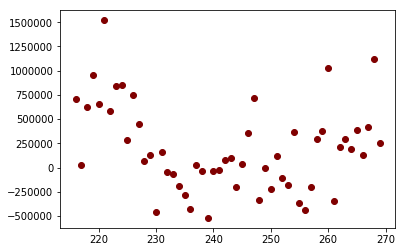

In [278]:
see_errors(5, 0, 1, 50)

In [279]:
print(f"min errors: {(yhat - validation_df['revenue']).max().round(2)}, \
      max errors: {(yhat - validation_df['revenue']).min().round(2)}")

min errors: 519766.07,       max errors: -1519835.09


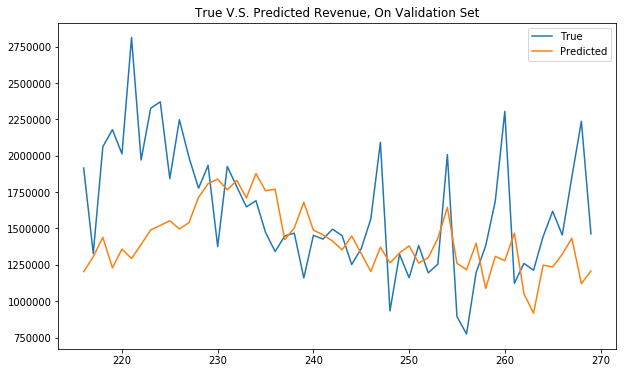

In [268]:
plt.figure(figsize = (10,6))
plt.plot(validation_df['revenue'], label = 'true'.title());
plt.plot(validation_df.index, yhat, label = 'predicted'.title())
plt.xticks = validation_df.index
plt.title('true v.s. predicted revenue, on validation set'.title())
plt.legend();

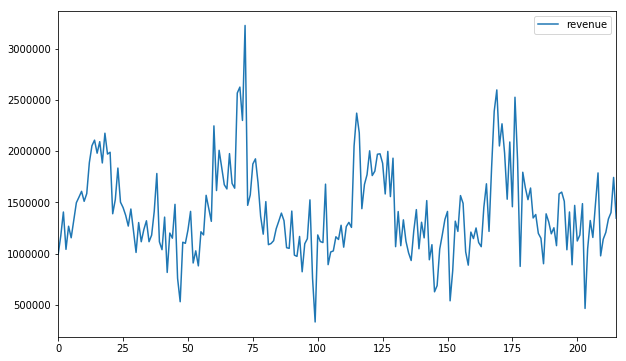

In [269]:
# reminder how the original sequence looked like
X.plot(figsize = (10,6));

Predicting on the testing dataset

In [280]:
model = SARIMAX(train_df['revenue'].values, seasonal_order=(5, 0, 1, 50), trend = 'ct') # (p,d,q) (P,D,Q,s)
model_fit = model.fit(disp = False)

yhat = model_fit.predict(1, len(test_df))

In [281]:
# revenue predictions for the next 10 weeks
yhat

array([1219595.122995  , 1306063.39800702, 1417241.72049689,
       1242438.01658678, 1350842.96449324, 1296852.90507377,
       1377883.69275682, 1461475.44495145, 1487464.21072649,
       1514868.45991736])

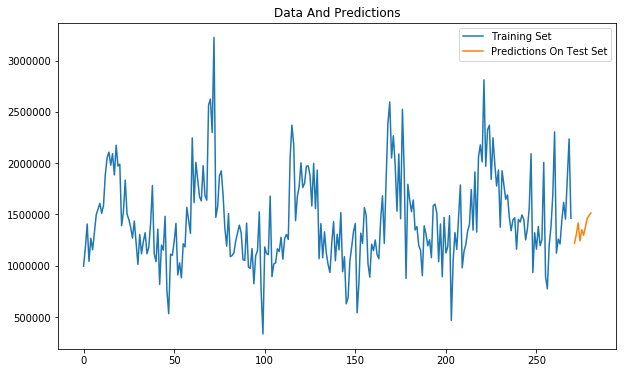

In [295]:
plt.figure(figsize = (10, 6))
plt.plot(train_df['revenue'], label = 'training set'.title())
plt.plot(range(271, 281), pd.Series(yhat), label = 'predictions on test set'.title())
# the range is (train_df.shape[0] +1, train_df.shape[0] + test_df.shape[0] +1) 
# because test_df is 10 rows
plt.title('data and predictions'.title())
plt.legend();

***
Saving (pickling) the model to run it later. 

In [308]:
import pickle
filename = 'time_series_model.sav'
pickle.dump(model_fit, open(filename, 'wb'))

In [310]:
# to make sure things will run smoothly when loading the saved fitted model:
loaded_model = pickle.load(open('time_series_model.sav', 'rb'))
loaded_model.predict(1, len(test_df))

array([1219595.122995  , 1306063.39800702, 1417241.72049689,
       1242438.01658678, 1350842.96449324, 1296852.90507377,
       1377883.69275682, 1461475.44495145, 1487464.21072649,
       1514868.45991736])